<h1><center>Análisis de Sistemas de Infraestructura <br>
    Taller 1: Manejo y Visualización de Datos de Infraestructura </center></h1>

El desarrollo de la infraestructura en un país está relacionado con la conectividad interna y hacia el exterior (i.e acceso a servicios de telefonía, acceso a Internet, redes de distribución, etc.). En este taller se van a explorar varias medidas de conectividad y su relación con la competitividad (Global Competitiveness Index, World Economic Forum).

<h2> 1. Procesamiento inicial y series de tiempo.</h2>

 Importar las librerías que usaremos en el taller

In [1]:
#Importar las librerías necesarias

import numpy as np #Libreria de operaciones matematicas y manejo de arrays numericos
import pandas as pd #Libreria para manejo de datos y estadistica
import matplotlib as mpl #Libreria para visualizacion de datos
import seaborn as sns #Libreria basada en Matplotlib con herramientas graficas avanzadas
import scipy.stats as st #Libreria con funciones estadisticas
import math 
import matplotlib.pyplot as plt
%matplotlib inline

<h3> Importar los datos </h3>

In [2]:
#Cargar los datos 
#Debe completar la ruta con el directorio donde se encuentre la carpeta de datos
Acceso_electricidad= pd.read_excel('API_EG.ELC.ACCS.ZS_DS2_en_excel_v2_5728806.xls') 
Kilometros_ferrocarriles= pd.read_excel('API_IS.RRS.TOTL.KM_DS2_en_excel_v2_5731519.xls')
Servidores_internet=pd.read_excel('API_IT.NET.SECR.P6_DS2_en_excel_v2_5731157.xls')
Telefonia_movil=pd.read_excel('API_IT.CEL.SETS.P2_DS2_en_excel_v2_5795725.xls')
Trafico_portuario=pd.read_excel('API_IS.SHP.GOOD.TU_DS2_en_excel_v2_5728930.xls')
Vuelos_aerolineas_registradas=pd.read_excel('API_IS.AIR.DPRT_DS2_en_excel_v2_5731485.xls')

Acceso_electricidad #Para revisar visualmente que esta pasando con nuestros arreglos de datos

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN
1,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.695183,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609,NaN
2,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,68.040878,89.500000,71.500000,97.700000,97.700000,93.430878,97.700000,97.700000,97.700000,NaN
3,Africa Western and Central,AFW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,47.051990,47.647405,46.758948,50.903108,48.787640,51.212863,51.160817,51.734388,54.224187,NaN
4,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.398178,32.000000,42.000000,41.785034,42.906242,45.290000,45.633881,46.955444,48.223854,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,75.600000,66.100000,67.414886,68.855865,79.200000,62.000000,72.776573,73.853462,74.877197,NaN
263,South Africa,ZAF,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.200000,85.900000,85.300000,83.900000,84.400000,84.700000,85.000000,90.000000,89.300000,NaN
264,Zambia,ZMB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,30.052702,27.900000,31.100000,35.377220,40.300000,40.229340,43.000000,44.604069,46.685116,NaN


<h3> Complete la información faltante – o elimine información – </h3>

In [3]:
#Eliminación de columnas con información sobrante

Acceso_electricidad.drop(['Country Code','Indicator Name','Indicator Code'], axis=1, inplace=True)
Kilometros_ferrocarriles.drop(['Country Code','Indicator Name','Indicator Code'], axis=1, inplace=True)
Servidores_internet.drop(['Country Code','Indicator Name','Indicator Code'], axis=1, inplace=True)
Telefonia_movil.drop(['Country Code','Indicator Name','Indicator Code'], axis=1, inplace=True)
Trafico_portuario.drop(['Country Code','Indicator Name','Indicator Code'], axis=1, inplace=True)
Vuelos_aerolineas_registradas.drop(['Country Code','Indicator Name','Indicator Code'], axis=1, inplace=True)

Acceso_electricidad #Para revisar visualmente que esta pasando con nuestros arreglos de datos

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN
1,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.695183,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609,NaN
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.040878,89.500000,71.500000,97.700000,97.700000,93.430878,97.700000,97.700000,97.700000,NaN
3,Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.051990,47.647405,46.758948,50.903108,48.787640,51.212863,51.160817,51.734388,54.224187,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.398178,32.000000,42.000000,41.785034,42.906242,45.290000,45.633881,46.955444,48.223854,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.600000,66.100000,67.414886,68.855865,79.200000,62.000000,72.776573,73.853462,74.877197,NaN
263,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85.200000,85.900000,85.300000,83.900000,84.400000,84.700000,85.000000,90.000000,89.300000,NaN
264,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.052702,27.900000,31.100000,35.377220,40.300000,40.229340,43.000000,44.604069,46.685116,NaN


In [4]:
#Eliminación de años donde no hay información 
Acceso_electricidad.dropna(axis=1,thresh=2,inplace=True)
Kilometros_ferrocarriles.dropna(axis=1,thresh=2,inplace=True)
Servidores_internet.dropna(axis=1,thresh=2,inplace=True)
Telefonia_movil.dropna(axis=1,thresh=2,inplace=True)
Trafico_portuario.dropna(axis=1,thresh=2,inplace=True)
Vuelos_aerolineas_registradas.dropna(axis=1,thresh=2,inplace=True)

Acceso_electricidad #Para revisar visualmente que esta pasando con nuestros arreglos de datos

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,100.0,99.153656,99.197128,99.239914,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.666928,31.695183,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.100000,68.040878,89.500000,71.500000,97.700000,97.700000,93.430878,97.700000,97.700000,97.700000
3,Africa Western and Central,NaN,NaN,NaN,31.575130,32.609692,33.605668,32.629322,32.461797,33.458630,...,44.053700,47.051990,47.647405,46.758948,50.903108,48.787640,51.212863,51.160817,51.734388,54.224187
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.259491,38.398178,32.000000,42.000000,41.785034,42.906242,45.290000,45.633881,46.955444,48.223854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",NaN,NaN,44.100000,40.774715,41.985134,43.193512,44.399170,42.600000,46.799610,...,52.410000,75.600000,66.100000,67.414886,68.855865,79.200000,62.000000,72.776573,73.853462,74.877197
263,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,57.600000,69.483353,64.900000,...,85.200000,85.200000,85.900000,85.300000,83.900000,84.400000,84.700000,85.000000,90.000000,89.300000
264,Zambia,13.9,12.752703,19.200000,14.213207,14.941759,15.668272,17.300000,17.112459,19.000000,...,29.186504,30.052702,27.900000,31.100000,35.377220,40.300000,40.229340,43.000000,44.604069,46.685116


In [5]:
#Indexar los datos de acuerdo con el nombre del país

Acceso_electricidad.set_index('Country Name',inplace=True)
Kilometros_ferrocarriles.set_index('Country Name',inplace=True)
Servidores_internet.set_index('Country Name',inplace=True)
Telefonia_movil.set_index('Country Name',inplace=True)
Trafico_portuario.set_index('Country Name',inplace=True)
Vuelos_aerolineas_registradas.set_index('Country Name',inplace=True)

Acceso_electricidad #Para revisar visualmente que esta pasando con nuestros arreglos de datos

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,100.0,99.153656,99.197128,99.239914,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.666928,31.695183,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.100000,68.040878,89.500000,71.500000,97.700000,97.700000,93.430878,97.700000,97.700000,97.700000
Africa Western and Central,NaN,NaN,NaN,31.575130,32.609692,33.605668,32.629322,32.461797,33.458630,34.810428,...,44.053700,47.051990,47.647405,46.758948,50.903108,48.787640,51.212863,51.160817,51.734388,54.224187
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.259491,38.398178,32.000000,42.000000,41.785034,42.906242,45.290000,45.633881,46.955444,48.223854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Yemen, Rep.",NaN,NaN,44.100000,40.774715,41.985134,43.193512,44.399170,42.600000,46.799610,47.992947,...,52.410000,75.600000,66.100000,67.414886,68.855865,79.200000,62.000000,72.776573,73.853462,74.877197
South Africa,NaN,NaN,NaN,NaN,NaN,NaN,57.600000,69.483353,64.900000,71.331787,...,85.200000,85.200000,85.900000,85.300000,83.900000,84.400000,84.700000,85.000000,90.000000,89.300000


In [6]:
#Eliminar datos que no corresponden a países 

No_paises=['Arab World','Central Europe and the Baltics','Caribbean small states','East Asia & Pacific (excluding high income)',
'Early-demographic dividend','East Asia & Pacific','Europe & Central Asia (excluding high income)',
'Europe & Central Asia','Euro area','Fragile and conflict affected situations','European Union',
'High income','Heavily indebted poor countries (HIPC)','IBRD only','IDA & IBRD total','IDA total','IDA blend',
'IDA only','Not classified','Latin America & Caribbean (excluding high income)','Latin America & Caribbean',
'Least developed countries: UN classification','Low income','Lower middle income','Low & middle income',
'Late-demographic dividend','Middle East & North Africa','Middle income','Middle East & North Africa (excluding high income)',
'North America','OECD members','Other small states','Pre-demographic dividend','Pacific island small states',
'Post-demographic dividend','Sub-Saharan Africa (excluding high income)','Small states',
'East Asia & Pacific (IDA & IBRD countries)','Europe & Central Asia (IDA & IBRD countries)',
'Latin America & the Caribbean (IDA & IBRD countries)','Middle East & North Africa (IDA & IBRD countries)',
'South Asia (IDA & IBRD)','Sub-Saharan Africa (IDA & IBRD countries)','Upper middle income','World', 'Africa Eastern and Southern', 'Africa Western and Central']

Acceso_electricidad.drop(No_paises, axis=0, inplace=True)
Kilometros_ferrocarriles.drop(No_paises, axis=0, inplace=True)
Servidores_internet.drop(No_paises, axis=0, inplace=True)
Telefonia_movil.drop(No_paises, axis=0, inplace=True)
Trafico_portuario.drop(No_paises, axis=0, inplace=True)
Vuelos_aerolineas_registradas.drop(No_paises, axis=0, inplace=True)

Acceso_electricidad #Para revisar visualmente que esta pasando con nuestros arreglos de datos

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,100.0,99.153656,99.197128,99.239914,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.100000,68.040878,89.50,71.500000,97.700000,97.700000,93.430878,97.700000,97.700000,97.700000
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.259491,38.398178,32.00,42.000000,41.785034,42.906242,45.290000,45.633881,46.955444,48.223854
Albania,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,99.900000,99.890312,99.95,99.980000,99.890000,99.890000,100.000000,100.000000,100.000000,100.000000
Andorra,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Yemen, Rep.",NaN,NaN,44.100000,40.774715,41.985134,43.193512,44.399170,42.600000,46.799610,47.992947,...,52.410000,75.600000,66.10,67.414886,68.855865,79.200000,62.000000,72.776573,73.853462,74.877197
South Africa,NaN,NaN,NaN,NaN,NaN,NaN,57.600000,69.483353,64.900000,71.331787,...,85.200000,85.200000,85.90,85.300000,83.900000,84.400000,84.700000,85.000000,90.000000,89.300000


In [7]:
#Eliminar los países que no contienen información

Acceso_electricidad.dropna(how='all', inplace=True)
Kilometros_ferrocarriles.dropna(how='all', inplace=True)
Servidores_internet.dropna(how='all', inplace=True)
Telefonia_movil.dropna(how='all', inplace=True)
Trafico_portuario.dropna(how='all', inplace=True)
Vuelos_aerolineas_registradas.dropna(how='all', inplace=True)

Acceso_electricidad #Para revisar visualmente que esta pasando con nuestros arreglos de datos

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,100.0,99.153656,99.197128,99.239914,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.100000,68.040878,89.50,71.500000,97.700000,97.700000,93.430878,97.700000,97.700000,97.700000
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.259491,38.398178,32.00,42.000000,41.785034,42.906242,45.290000,45.633881,46.955444,48.223854
Albania,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,99.900000,99.890312,99.95,99.980000,99.890000,99.890000,100.000000,100.000000,100.000000,100.000000
Andorra,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Yemen, Rep.",NaN,NaN,44.100000,40.774715,41.985134,43.193512,44.399170,42.600000,46.799610,47.992947,...,52.410000,75.600000,66.10,67.414886,68.855865,79.200000,62.000000,72.776573,73.853462,74.877197
South Africa,NaN,NaN,NaN,NaN,NaN,NaN,57.600000,69.483353,64.900000,71.331787,...,85.200000,85.200000,85.90,85.300000,83.900000,84.400000,84.700000,85.000000,90.000000,89.300000


In [8]:
#Interpolar para completar datos faltantes

Acceso_electricidad.interpolate(method ='linear', limit_direction ='both', axis=1, inplace=True) 
Kilometros_ferrocarriles.interpolate(method ='linear', limit_direction ='both', axis=1, inplace=True) 
Servidores_internet.interpolate(method ='linear', limit_direction ='both', axis=1, inplace=True) 
Telefonia_movil.interpolate(method ='linear', limit_direction ='both', axis=1, inplace=True) 
Trafico_portuario.interpolate(method ='linear', limit_direction ='both', axis=1, inplace=True) 
Vuelos_aerolineas_registradas.interpolate(method ='linear', limit_direction ='both', axis=1, inplace=True) 

Acceso_electricidad #Para revisar visualmente que esta pasando con nuestros arreglos de datos

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,100.000000,99.153656,99.197128,99.239914,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
Afghanistan,4.446891,4.446891,4.446891,4.446891,4.446891,4.446891,4.446891,4.446891,4.446891,4.446891,...,69.100000,68.040878,89.50,71.500000,97.700000,97.700000,93.430878,97.700000,97.700000,97.700000
Angola,24.238865,24.238865,24.238865,24.238865,24.238865,24.238865,24.238865,24.238865,24.238865,24.238865,...,37.259491,38.398178,32.00,42.000000,41.785034,42.906242,45.290000,45.633881,46.955444,48.223854
Albania,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,99.900000,99.890312,99.95,99.980000,99.890000,99.890000,100.000000,100.000000,100.000000,100.000000
Andorra,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
"Yemen, Rep.",44.100000,44.100000,44.100000,40.774715,41.985134,43.193512,44.399170,42.600000,46.799610,47.992947,...,52.410000,75.600000,66.10,67.414886,68.855865,79.200000,62.000000,72.776573,73.853462,74.877197
South Africa,57.600000,57.600000,57.600000,57.600000,57.600000,57.600000,57.600000,69.483353,64.900000,71.331787,...,85.200000,85.200000,85.90,85.300000,83.900000,84.400000,84.700000,85.000000,90.000000,89.300000


In [9]:
#Visualizar el resultado del procesamiento de la base de datos de kilómetros de ferrocarriles

Kilometros_ferrocarriles

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Albania,674.0,447.0,447.0,447.0,440.0,440.000000,447.000000,447.000000,447.000000,447.000000,...,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.0,423.0,423.0,423.0
United Arab Emirates,279.0,279.0,279.0,279.0,279.0,279.000000,279.000000,279.000000,279.000000,279.000000,...,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.0,261.0,261.0,279.0
Argentina,3150.0,3150.0,3150.0,3150.0,3150.0,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,...,17438.571429,18097.000000,18097.000000,17853.000000,17609.000000,17609.000000,17866.0,17866.0,17866.0,17866.0
Armenia,796.0,796.0,796.0,796.0,843.0,843.000000,843.000000,711.000000,711.000000,711.000000,...,764.636005,733.918003,703.200000,703.200000,679.363000,685.660000,698.4,698.4,698.4,698.4
Austria,5672.0,5672.0,5672.0,5739.0,5740.0,5665.000000,5697.000000,5779.000000,5752.000000,5766.000000,...,4985.000000,4950.000000,4956.000000,4937.000000,4917.000000,4953.000000,4955.0,4968.0,4966.0,4962.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, RB",336.0,336.0,336.0,336.0,336.0,336.000000,336.000000,336.000000,336.000000,336.000000,...,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.0,336.0,336.0,336.0
Vietnam,2832.0,2646.0,2414.0,2632.0,2632.0,3142.000000,2347.000000,2545.000000,2600.000000,2671.000000,...,2347.000000,2347.000000,3186.000000,3186.000000,2581.000000,2367.000000,2382.0,2481.0,3159.0,3159.0
South Africa,20953.0,20953.0,20953.0,20953.0,20953.0,20953.000000,20953.000000,20953.000000,20953.000000,20953.000000,...,20953.000000,20953.000000,20953.000000,20953.000000,20953.000000,20953.000000,20953.0,20953.0,20953.0,20953.0


<h3>Genere un diagrama de Box-Plot para la serie de tiempo de servidores seguros de internet de los paises latinoamericanos y del caribe</h3>

In [10]:
#Para poder realizar la transformacion logaritmica sin errores
Servidores_internet=Servidores_internet.replace(0,0.0001)
Acceso_electricidad=Acceso_electricidad.replace(0,0.0001)
Kilometros_ferrocarriles=Kilometros_ferrocarriles.replace(0,0.0001)
Telefonia_movil=Telefonia_movil.replace(0,0.0001)
Trafico_portuario=Trafico_portuario.replace(0,0.0001)
Vuelos_aerolineas_registradas=Vuelos_aerolineas_registradas.replace(0,0.0001)

#Transformación logaritmica de los datos
Servidores_internet_log=np.log(Servidores_internet)
Acceso_electricidad_log=np.log(Acceso_electricidad)
Kilometros_ferrocarriles_log=np.log(Kilometros_ferrocarriles)
Telefonia_movil_log=np.log(Telefonia_movil)
Trafico_portuario_log=np.log(Trafico_portuario)
Vuelos_aerolineas_registradas_log=np.log(Vuelos_aerolineas_registradas)

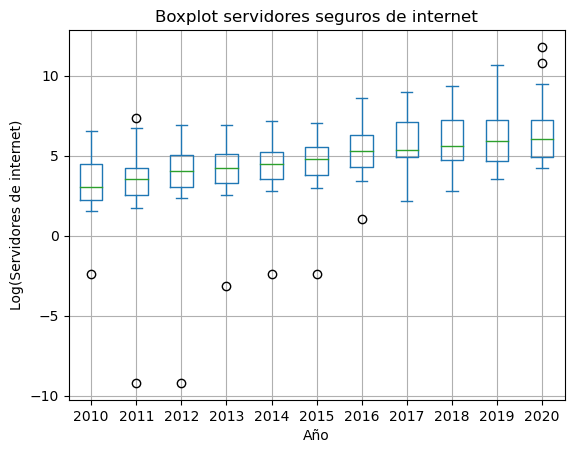

In [11]:
paises_lat=['Brazil','Mexico','Colombia','Argentina','Peru','Venezuela, RB','Chile','Guatemala','Ecuador',
'Cuba','Dominican Republic','Honduras','Paraguay','Costa Rica','Nicaragua','Panama','Jamaica','El Salvador',
'Grenada','Guatemala', 'Honduras','Trinidad and Tobago','Suriname',
'Belize','Bahamas, The','Barbados','St. Lucia','Grenada','St. Vincent and the Grenadines','Antigua and Barbuda',
'St. Kitts and Nevis','Dominica']
Servidores_internet_log.loc[paises_lat,:].plot(kind='box')
plt.title('Boxplot servidores seguros de internet')
plt.xlabel('Año')
plt.ylabel('Log(Servidores de internet)')
plt.grid()

Código de ayuda para el análisis requerido del diagrama Box-Plot...

In [12]:
# PARA EL AÑO 2010...

Q3_2010=Servidores_internet_log.loc[paises_lat,'2010'].quantile(0.75) #Calculo del tercer cuartil
Q1_2010=Servidores_internet_log.loc[paises_lat,'2010'].quantile(0.25) #Calculo del primer cuartil
IQR_2010=Q3_2010-Q1_2010 #Calculo del rango intercuartil
OUT_TU=Q3_2010+1.5*IQR_2010 #Calculo del limite de outliers superior
OUT_TD=Q1_2010-1.5*IQR_2010 #Calculo del limite de outliers inferior

print('Cuartil 3 año 2010 es', round(Q3_2010,2))
print('Cuartil 1 año 2010 es', round(Q1_2010,2))
print('El rango intercuartil año 2010 es', round(IQR_2010,2))
print('Limite de outliers superior año 2010 es', round(OUT_TU,2))
print('Limite de outliers inferior año 2010 es', round(OUT_TD,2))

Cuartil 3 año 2010 es 4.47
Cuartil 1 año 2010 es 2.25
El rango intercuartil año 2010 es 2.22
Limite de outliers superior año 2010 es 7.81
Limite de outliers inferior año 2010 es -1.08


In [13]:
Servidores_internet_log.loc[paises_lat,'2010']<OUT_TD

Country Name
Brazil                            False
Mexico                            False
Colombia                          False
Argentina                         False
Peru                              False
Venezuela, RB                     False
Chile                             False
Guatemala                         False
Ecuador                           False
Cuba                               True
Dominican Republic                False
Honduras                          False
Paraguay                          False
Costa Rica                        False
Nicaragua                         False
Panama                            False
Jamaica                           False
El Salvador                       False
Grenada                           False
Guatemala                         False
Honduras                          False
Trinidad and Tobago               False
Suriname                          False
Belize                            False
Bahamas, The               

In [14]:
# PARA EL AÑO 2011...

Q3_2011=Servidores_internet_log.loc[paises_lat,'2011'].quantile(0.75) #Calculo del tercer cuartil
Q1_2011=Servidores_internet_log.loc[paises_lat,'2011'].quantile(0.25) #Calculo del primer cuartil
IQR_2011=Q3_2011-Q1_2011 #Calculo del rango intercuartil
OUT_TU=Q3_2011+1.5*IQR_2011 #Calculo del limite de outliers superior
OUT_TD=Q1_2011-1.5*IQR_2011 #Calculo del limite de outliers inferior

print('Cuartil 3 año 2011 es', round(Q3_2011,2))
print('Cuartil 1 año 2011 es', round(Q1_2011,2))
print('El rango intercuartil año 2011 es', round(IQR_2011,2))
print('Limite de outliers superior año 2011 es', round(OUT_TU,2))
print('Limite de outliers inferior año 2011 es', round(OUT_TD,2))

Servidores_internet_log.loc[paises_lat,'2011']<OUT_TD

Cuartil 3 año 2011 es 4.25
Cuartil 1 año 2011 es 2.55
El rango intercuartil año 2011 es 1.71
Limite de outliers superior año 2011 es 6.81
Limite de outliers inferior año 2011 es -0.01


Country Name
Brazil                            False
Mexico                            False
Colombia                          False
Argentina                         False
Peru                              False
Venezuela, RB                     False
Chile                             False
Guatemala                         False
Ecuador                           False
Cuba                               True
Dominican Republic                False
Honduras                          False
Paraguay                          False
Costa Rica                        False
Nicaragua                         False
Panama                            False
Jamaica                           False
El Salvador                       False
Grenada                           False
Guatemala                         False
Honduras                          False
Trinidad and Tobago               False
Suriname                          False
Belize                            False
Bahamas, The               

In [15]:
# PARA EL AÑO 2011...

Q3_2011=Servidores_internet_log.loc[paises_lat,'2011'].quantile(0.75) #Calculo del tercer cuartil
Q1_2011=Servidores_internet_log.loc[paises_lat,'2011'].quantile(0.25) #Calculo del primer cuartil
IQR_2011=Q3_2011-Q1_2011 #Calculo del rango intercuartil
OUT_TU=Q3_2011+1.5*IQR_2011 #Calculo del limite de outliers superior
OUT_TD=Q1_2011-1.5*IQR_2011 #Calculo del limite de outliers inferior

print('Cuartil 3 año 2011 es', round(Q3_2011,2))
print('Cuartil 1 año 2011 es', round(Q1_2011,2))
print('El rango intercuartil año 2011 es', round(IQR_2011,2))
print('Limite de outliers superior año 2011 es', round(OUT_TU,2))
print('Limite de outliers inferior año 2011 es', round(OUT_TD,2))

Servidores_internet_log.loc[paises_lat,'2011']>OUT_TU

Cuartil 3 año 2011 es 4.25
Cuartil 1 año 2011 es 2.55
El rango intercuartil año 2011 es 1.71
Limite de outliers superior año 2011 es 6.81
Limite de outliers inferior año 2011 es -0.01


Country Name
Brazil                            False
Mexico                            False
Colombia                          False
Argentina                         False
Peru                              False
Venezuela, RB                     False
Chile                             False
Guatemala                         False
Ecuador                           False
Cuba                              False
Dominican Republic                False
Honduras                          False
Paraguay                          False
Costa Rica                        False
Nicaragua                         False
Panama                            False
Jamaica                           False
El Salvador                       False
Grenada                           False
Guatemala                         False
Honduras                          False
Trinidad and Tobago               False
Suriname                          False
Belize                            False
Bahamas, The               

In [16]:
# PARA EL AÑO 2012...

Q3_2012=Servidores_internet_log.loc[paises_lat,'2012'].quantile(0.75) #Calculo del tercer cuartil
Q1_2012=Servidores_internet_log.loc[paises_lat,'2012'].quantile(0.25) #Calculo del primer cuartil
IQR_2012=Q3_2012-Q1_2012 #Calculo del rango intercuartil
OUT_TU=Q3_2012+1.5*IQR_2012 #Calculo del limite de outliers superior
OUT_TD=Q1_2012-1.5*IQR_2012 #Calculo del limite de outliers inferior

print('Cuartil 3 año 2012 es', round(Q3_2012,2))
print('Cuartil 1 año 2012 es', round(Q1_2012,2))
print('El rango intercuartil año 2012 es', round(IQR_2012,2))
print('Limite de outliers superior año 2012 es', round(OUT_TU,2))
print('Limite de outliers inferior año 2012 es', round(OUT_TD,2))

Servidores_internet_log.loc[paises_lat,'2012']<OUT_TD

Cuartil 3 año 2012 es 5.01
Cuartil 1 año 2012 es 3.03
El rango intercuartil año 2012 es 1.98
Limite de outliers superior año 2012 es 7.98
Limite de outliers inferior año 2012 es 0.06


Country Name
Brazil                            False
Mexico                            False
Colombia                          False
Argentina                         False
Peru                              False
Venezuela, RB                     False
Chile                             False
Guatemala                         False
Ecuador                           False
Cuba                               True
Dominican Republic                False
Honduras                          False
Paraguay                          False
Costa Rica                        False
Nicaragua                         False
Panama                            False
Jamaica                           False
El Salvador                       False
Grenada                           False
Guatemala                         False
Honduras                          False
Trinidad and Tobago               False
Suriname                          False
Belize                            False
Bahamas, The               

In [17]:
# PARA EL AÑO 2013...

Q3_2013=Servidores_internet_log.loc[paises_lat,'2013'].quantile(0.75) #Calculo del tercer cuartil
Q1_2013=Servidores_internet_log.loc[paises_lat,'2013'].quantile(0.25) #Calculo del primer cuartil
IQR_2013=Q3_2013-Q1_2013 #Calculo del rango intercuartil
OUT_TU=Q3_2013+1.5*IQR_2013 #Calculo del limite de outliers superior
OUT_TD=Q1_2013-1.5*IQR_2013 #Calculo del limite de outliers inferior

print('Cuartil 3 año 2013 es', round(Q3_2013,2))
print('Cuartil 1 año 2013 es', round(Q1_2013,2))
print('El rango intercuartil año 2013 es', round(IQR_2013,2))
print('Limite de outliers superior año 2013 es', round(OUT_TU,2))
print('Limite de outliers inferior año 2013 es', round(OUT_TD,2))

Servidores_internet_log.loc[paises_lat,'2013']<OUT_TD

Cuartil 3 año 2013 es 5.11
Cuartil 1 año 2013 es 3.27
El rango intercuartil año 2013 es 1.84
Limite de outliers superior año 2013 es 7.86
Limite de outliers inferior año 2013 es 0.52


Country Name
Brazil                            False
Mexico                            False
Colombia                          False
Argentina                         False
Peru                              False
Venezuela, RB                     False
Chile                             False
Guatemala                         False
Ecuador                           False
Cuba                               True
Dominican Republic                False
Honduras                          False
Paraguay                          False
Costa Rica                        False
Nicaragua                         False
Panama                            False
Jamaica                           False
El Salvador                       False
Grenada                           False
Guatemala                         False
Honduras                          False
Trinidad and Tobago               False
Suriname                          False
Belize                            False
Bahamas, The               

In [18]:
# PARA EL AÑO 2014...

Q3_2014=Servidores_internet_log.loc[paises_lat,'2014'].quantile(0.75) #Calculo del tercer cuartil
Q1_2014=Servidores_internet_log.loc[paises_lat,'2014'].quantile(0.25) #Calculo del primer cuartil
IQR_2014=Q3_2014-Q1_2014 #Calculo del rango intercuartil
OUT_TU=Q3_2014+1.5*IQR_2014 #Calculo del limite de outliers superior
OUT_TD=Q1_2014-1.5*IQR_2014 #Calculo del limite de outliers inferior

print('Cuartil 3 año 2014 es', round(Q3_2014,2))
print('Cuartil 1 año 2014 es', round(Q1_2014,2))
print('El rango intercuartil año 2014 es', round(IQR_2014,2))
print('Limite de outliers superior año 2014 es', round(OUT_TU,2))
print('Limite de outliers inferior año 2014 es', round(OUT_TD,2))

Servidores_internet_log.loc[paises_lat,'2014']<OUT_TD

Cuartil 3 año 2014 es 5.21
Cuartil 1 año 2014 es 3.54
El rango intercuartil año 2014 es 1.67
Limite de outliers superior año 2014 es 7.71
Limite de outliers inferior año 2014 es 1.04


Country Name
Brazil                            False
Mexico                            False
Colombia                          False
Argentina                         False
Peru                              False
Venezuela, RB                     False
Chile                             False
Guatemala                         False
Ecuador                           False
Cuba                               True
Dominican Republic                False
Honduras                          False
Paraguay                          False
Costa Rica                        False
Nicaragua                         False
Panama                            False
Jamaica                           False
El Salvador                       False
Grenada                           False
Guatemala                         False
Honduras                          False
Trinidad and Tobago               False
Suriname                          False
Belize                            False
Bahamas, The               

In [19]:
# PARA EL AÑO 2015...

Q3_2015=Servidores_internet_log.loc[paises_lat,'2015'].quantile(0.75) #Calculo del tercer cuartil
Q1_2015=Servidores_internet_log.loc[paises_lat,'2015'].quantile(0.25) #Calculo del primer cuartil
IQR_2015=Q3_2015-Q1_2015 #Calculo del rango intercuartil
OUT_TU=Q3_2015+1.5*IQR_2015 #Calculo del limite de outliers superior
OUT_TD=Q1_2015-1.5*IQR_2015 #Calculo del limite de outliers inferior

print('Cuartil 3 año 2015 es', round(Q3_2015,2))
print('Cuartil 1 año 2015 es', round(Q1_2015,2))
print('El rango intercuartil año 2015 es', round(IQR_2015,2))
print('Limite de outliers superior año 2015 es', round(OUT_TU,2))
print('Limite de outliers inferior año 2015 es', round(OUT_TD,2))

Servidores_internet_log.loc[paises_lat,'2015']<OUT_TD

Cuartil 3 año 2015 es 5.55
Cuartil 1 año 2015 es 3.81
El rango intercuartil año 2015 es 1.74
Limite de outliers superior año 2015 es 8.15
Limite de outliers inferior año 2015 es 1.21


Country Name
Brazil                            False
Mexico                            False
Colombia                          False
Argentina                         False
Peru                              False
Venezuela, RB                     False
Chile                             False
Guatemala                         False
Ecuador                           False
Cuba                               True
Dominican Republic                False
Honduras                          False
Paraguay                          False
Costa Rica                        False
Nicaragua                         False
Panama                            False
Jamaica                           False
El Salvador                       False
Grenada                           False
Guatemala                         False
Honduras                          False
Trinidad and Tobago               False
Suriname                          False
Belize                            False
Bahamas, The               

In [20]:
# PARA EL AÑO 2016...

Q3_2016=Servidores_internet_log.loc[paises_lat,'2016'].quantile(0.75) #Calculo del tercer cuartil
Q1_2016=Servidores_internet_log.loc[paises_lat,'2016'].quantile(0.25) #Calculo del primer cuartil
IQR_2016=Q3_2016-Q1_2016 #Calculo del rango intercuartil
OUT_TU=Q3_2016+1.5*IQR_2016 #Calculo del limite de outliers superior
OUT_TD=Q1_2016-1.5*IQR_2016 #Calculo del limite de outliers inferior

print('Cuartil 3 año 2016 es', round(Q3_2016,2))
print('Cuartil 1 año 2016 es', round(Q1_2016,2))
print('El rango intercuartil año 2016 es', round(IQR_2016,2))
print('Limite de outliers superior año 2016 es', round(OUT_TU,2))
print('Limite de outliers inferior año 2016 es', round(OUT_TD,2))

Servidores_internet_log.loc[paises_lat,'2016']<OUT_TD

Cuartil 3 año 2016 es 6.3
Cuartil 1 año 2016 es 4.26
El rango intercuartil año 2016 es 2.04
Limite de outliers superior año 2016 es 9.37
Limite de outliers inferior año 2016 es 1.19


Country Name
Brazil                            False
Mexico                            False
Colombia                          False
Argentina                         False
Peru                              False
Venezuela, RB                     False
Chile                             False
Guatemala                         False
Ecuador                           False
Cuba                               True
Dominican Republic                False
Honduras                          False
Paraguay                          False
Costa Rica                        False
Nicaragua                         False
Panama                            False
Jamaica                           False
El Salvador                       False
Grenada                           False
Guatemala                         False
Honduras                          False
Trinidad and Tobago               False
Suriname                          False
Belize                            False
Bahamas, The               

In [21]:
# PARA EL AÑO 2020...

Q3_2020=Servidores_internet_log.loc[paises_lat,'2020'].quantile(0.75) #Calculo del tercer cuartil
Q1_2020=Servidores_internet_log.loc[paises_lat,'2020'].quantile(0.25) #Calculo del primer cuartil
IQR_2020=Q3_2020-Q1_2020 #Calculo del rango intercuartil
OUT_TU=Q3_2020+1.5*IQR_2020 #Calculo del limite de outliers superior
OUT_TD=Q1_2020-1.5*IQR_2020 #Calculo del limite de outliers inferior

print('Cuartil 3 año 2020 es', round(Q3_2020,2))
print('Cuartil 1 año 2020 es', round(Q1_2020,2))
print('El rango intercuartil año 2020 es', round(IQR_2020,2))
print('Limite de outliers superior año 2020 es', round(OUT_TU,2))
print('Limite de outliers inferior año 2020 es', round(OUT_TD,2))

Servidores_internet_log.loc[paises_lat,'2020']>OUT_TU

Cuartil 3 año 2020 es 7.21
Cuartil 1 año 2020 es 4.93
El rango intercuartil año 2020 es 2.29
Limite de outliers superior año 2020 es 10.64
Limite de outliers inferior año 2020 es 1.5


Country Name
Brazil                            False
Mexico                            False
Colombia                          False
Argentina                         False
Peru                              False
Venezuela, RB                     False
Chile                             False
Guatemala                         False
Ecuador                           False
Cuba                              False
Dominican Republic                False
Honduras                          False
Paraguay                          False
Costa Rica                        False
Nicaragua                         False
Panama                            False
Jamaica                           False
El Salvador                       False
Grenada                           False
Guatemala                         False
Honduras                          False
Trinidad and Tobago               False
Suriname                          False
Belize                             True
Bahamas, The               